**Steps required to train your own multilayer perceptron on the CIFAR dataset**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, utils, datasets

**0. Parameters**

In [31]:
NUM_CLASSES = 10

**1. Prepare the Data**

In [32]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [33]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [34]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


**2. Build the model**

In [35]:
input_layer = layers.Input((32, 32, 3))
x = layers.Flatten()(input_layer)

x = layers.Dense(512, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

**3. Train the model**

In [36]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
opt = optimizers.Adam(learning_rate=0.001)

model.compile(loss=loss_fn, optimizer=opt, metrics=["accuracy"])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True),
    ModelCheckpoint("best_mlp_model.h5", save_best_only=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)
]

model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=50,
    shuffle=True,
    validation_split=0.1,
    callbacks=callbacks
)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2525 - loss: 2.3389

352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2526 - loss: 2.3383 - val_accuracy: 0.3506 - val_loss: 1.9011 - learning_rate: 0.0010
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3671 - loss: 1.8903 - val_accuracy: 0.3394 - val_loss: 1.9522 - learning_rate: 0.0010
Epoch 3/50
343/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3995 - loss: 1.8120

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3996 - loss: 1.8119 - val_accuracy: 0.3798 - val_loss: 1.8208 - learning_rate: 0.0010
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4178 - loss: 1.7814 - val_accuracy: 0.3918 - val_loss: 1.8426 - learning_rate: 0.0010
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4221 - loss: 1.7635 - val_accuracy: 0.3892 - val_loss: 1.8281 - learning_rate: 0.0010
Epoch 6/50
338/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4232 - loss: 1.7611

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4232 - loss: 1.7609 - val_accuracy: 0.4344 - val_loss: 1.7402 - learning_rate: 0.0010
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4276 - loss: 1.7436 - val_accuracy: 0.4018 - val_loss: 1.7937 - learning_rate: 0.0010
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4350 - loss: 1.7305 - val_accuracy: 0.3820 - val_loss: 1.8379 - learning_rate: 0.0010
Epoch 9/50
339/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4412 - loss: 1.7224

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4412 - loss: 1.7224 - val_accuracy: 0.4524 - val_loss: 1.6997 - learning_rate: 0.0010
Epoch 10/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4417 - loss: 1.7273

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4418 - loss: 1.7271 - val_accuracy: 0.4576 - val_loss: 1.6871 - learning_rate: 0.0010
Epoch 11/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4521 - loss: 1.7016 - val_accuracy: 0.2732 - val_loss: 2.0867 - learning_rate: 0.0010
Epoch 12/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4500 - loss: 1.7011 - val_accuracy: 0.4504 - val_loss: 1.7042 - learning_rate: 0.0010
Epoch 13/50
342/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4500 - loss: 1.7065

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4499 - loss: 1.7066 - val_accuracy: 0.4820 - val_loss: 1.6329 - learning_rate: 0.0010
Epoch 14/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4580 - loss: 1.6905 - val_accuracy: 0.4618 - val_loss: 1.6698 - learning_rate: 0.0010
Epoch 15/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4584 - loss: 1.6806 - val_accuracy: 0.4768 - val_loss: 1.6381 - learning_rate: 0.0010
Epoch 16/50
342/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4613 - loss: 1.6816
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4613 - loss: 1.6816 - val_accuracy: 0.4800 - val_loss: 1.6407 - learning_rate: 0.0010
Epoch 17/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4750 - loss: 1.6529

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4751 - loss: 1.6528 - val_accuracy: 0.4994 - val_loss: 1.5850 - learning_rate: 3.0000e-04
Epoch 18/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4822 - loss: 1.6370

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4822 - loss: 1.6370 - val_accuracy: 0.5040 - val_loss: 1.5788 - learning_rate: 3.0000e-04
Epoch 19/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4840 - loss: 1.6363 - val_accuracy: 0.5048 - val_loss: 1.5925 - learning_rate: 3.0000e-04
Epoch 20/50
347/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4895 - loss: 1.6331

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4894 - loss: 1.6331 - val_accuracy: 0.5032 - val_loss: 1.5756 - learning_rate: 3.0000e-04
Epoch 21/50
338/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4944 - loss: 1.6214

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4941 - loss: 1.6219 - val_accuracy: 0.5082 - val_loss: 1.5690 - learning_rate: 3.0000e-04
Epoch 22/50
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4916 - loss: 1.6228

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4916 - loss: 1.6228 - val_accuracy: 0.5110 - val_loss: 1.5683 - learning_rate: 3.0000e-04
Epoch 23/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4913 - loss: 1.6249 - val_accuracy: 0.5092 - val_loss: 1.5714 - learning_rate: 3.0000e-04
Epoch 24/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4875 - loss: 1.6281 - val_accuracy: 0.5060 - val_loss: 1.5712 - learning_rate: 3.0000e-04
Epoch 25/50
338/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4913 - loss: 1.6157
Epoch 25: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4913 - loss: 1.6159 - val_accuracy: 0.5034 - val_loss: 1.5706 - learning_rate: 3.0000e-04
Epoch 26/50
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 1.6117

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4974 - loss: 1.6117 - val_accuracy: 0.5150 - val_loss: 1.5494 - learning_rate: 9.0000e-05
Epoch 27/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4996 - loss: 1.6071 - val_accuracy: 0.5156 - val_loss: 1.5502 - learning_rate: 9.0000e-05
Epoch 28/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4947 - loss: 1.6115 - val_accuracy: 0.5122 - val_loss: 1.5497 - learning_rate: 9.0000e-05
Epoch 29/50
342/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 1.6132

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4940 - loss: 1.6132 - val_accuracy: 0.5166 - val_loss: 1.5483 - learning_rate: 9.0000e-05
Epoch 30/50
345/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4958 - loss: 1.6083

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4959 - loss: 1.6082 - val_accuracy: 0.5208 - val_loss: 1.5449 - learning_rate: 9.0000e-05
Epoch 31/50
340/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4975 - loss: 1.6058

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4976 - loss: 1.6057 - val_accuracy: 0.5160 - val_loss: 1.5447 - learning_rate: 9.0000e-05
Epoch 32/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5036 - loss: 1.5960

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5036 - loss: 1.5960 - val_accuracy: 0.5202 - val_loss: 1.5406 - learning_rate: 9.0000e-05
Epoch 33/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5005 - loss: 1.6007 - val_accuracy: 0.5190 - val_loss: 1.5432 - learning_rate: 9.0000e-05
Epoch 34/50
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5020 - loss: 1.5985

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5020 - loss: 1.5985 - val_accuracy: 0.5216 - val_loss: 1.5400 - learning_rate: 9.0000e-05
Epoch 35/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5012 - loss: 1.5964 - val_accuracy: 0.5214 - val_loss: 1.5437 - learning_rate: 9.0000e-05
Epoch 36/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5058 - loss: 1.5947 - val_accuracy: 0.5150 - val_loss: 1.5477 - learning_rate: 9.0000e-05
Epoch 37/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5004 - loss: 1.6036
Epoch 37: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5004 - loss: 1.6036 - val_accuracy: 0.5158 - val_loss: 1.5457 - learning_rate: 9.0000e-05
Epoch 38/50
340/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5009 - loss: 1.5958

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5011 - loss: 1.5958 - val_accuracy: 0.5206 - val_loss: 1.5364 - learning_rate: 2.7000e-05
Epoch 39/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5082 - loss: 1.5937 - val_accuracy: 0.5216 - val_loss: 1.5365 - learning_rate: 2.7000e-05
Epoch 40/50
343/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5089 - loss: 1.5855

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5088 - loss: 1.5858 - val_accuracy: 0.5200 - val_loss: 1.5362 - learning_rate: 2.7000e-05
Epoch 41/50
340/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: 1.5888

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5063 - loss: 1.5890 - val_accuracy: 0.5206 - val_loss: 1.5358 - learning_rate: 2.7000e-05
Epoch 42/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5068 - loss: 1.5906 - val_accuracy: 0.5228 - val_loss: 1.5360 - learning_rate: 2.7000e-05
Epoch 43/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5060 - loss: 1.5902 - val_accuracy: 0.5188 - val_loss: 1.5370 - learning_rate: 2.7000e-05
Epoch 44/50
343/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5022 - loss: 1.6000
Epoch 44: ReduceLROnPlateau reducing learning rate to 8.100000013655517e-06.
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5023 - loss: 1.5999 - val_accuracy: 0.5208 - val_loss: 1.5358 - learning_rate: 2.7000e-05
Epoch 45/50
342/352 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5029 - loss: 1.5972

352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5030 - loss: 1.5970 - val_accuracy: 0.5208 - val_loss: 1.5355 - learning_rate: 8.1000e-06
Epoch 46/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5034 - loss: 1.5953

352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5035 - loss: 1.5952 - val_accuracy: 0.5200 - val_loss: 1.5347 - learning_rate: 8.1000e-06
Epoch 47/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5036 - loss: 1.5893 - val_accuracy: 0.5202 - val_loss: 1.5348 - learning_rate: 8.1000e-06
Epoch 48/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5083 - loss: 1.5875 - val_accuracy: 0.5198 - val_loss: 1.5356 - learning_rate: 8.1000e-06
Epoch 49/50
346/352 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 1.5937
Epoch 49: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5013 - loss: 1.5937 - val_accuracy: 0.5214 - val_loss: 1.5348 - learning_rate: 8.1000e-06
Epoch 50/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5017 - loss: 1.5935 - val_accuracy: 0.5208 - val_loss: 1.5349 - learning_rate: 2.4300e-06


**4. Evaluation**

In [38]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5253 - loss: 1.5395


[1.5444945096969604, 0.5230000019073486]

**5.Viewing predictions on the test set using the predict method**

In [39]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**6.Displaying predictions against the actual labels**

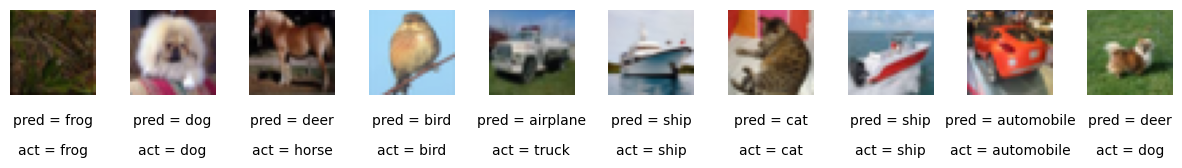

In [40]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)